# 군집분석

---

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')

import matplotlib.cm
cmap = matplotlib.cm.get_cmap('plasma')

import warnings
warnings.filterwarnings("ignore")

## 1. 데이터 불러오기

In [3]:
data = pd.read_csv('data/Mall_Customers.csv')
X = data.iloc[:, [3,4]]
X.head()

,Income,Spend
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


## 2. clustering 이해


In [5]:
from sklearn.cluster import KMeans

In [6]:
wcss = []

for i in range(1,21):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit_transform(X)
    wcss.append(kmeans.inertia_)

In [7]:
wcss

[269981.28,
 181363.59595959596,
 106348.37306211118,
 73679.78903948834,
 44448.45544793371,
 37239.83554245604,
 30566.451130251862,
 24990.4343103969,
 21932.39204424098,
 19653.38360624882,
 17508.97057740007,
 15970.937387150672,
 14306.837671530395,
 13186.274147489936,
 11668.48635995439,
 10803.574544315334,
 10012.870805546718,
 9494.313097428887,
 8683.638341543514,
 8160.149628390932]

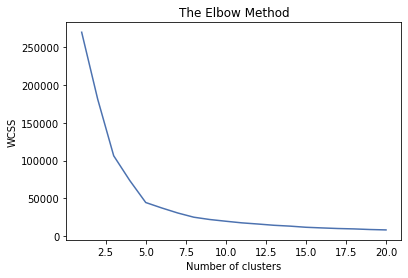

In [8]:
plt.figure()
plt.plot(range(1,21), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [9]:
# k개로 군집화
k = 5
kmeans = KMeans(n_clusters = k)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 4,
       2, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 1, 0, 4, 0, 1, 0, 1, 0,
       4, 0, 1, 0, 1, 0, 1, 0, 1, 0, 4, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0], dtype=int32)

In [10]:
# 데이터프레임에 적용
Group_cluster=pd.DataFrame(y_kmeans)
Group_cluster.columns=['Group']
full_data=pd.concat([data, Group_cluster], axis=1)
full_data

,ID,Gender,Age,Income,Spend,Group
0,1,Male,19,15,39,2
1,2,Male,21,15,81,3
2,3,Female,20,16,6,2
3,4,Female,23,16,77,3
4,5,Female,31,17,40,2
...,...,...,...,...,...,...
195,196,Female,35,120,79,0
196,197,Female,45,126,28,1
197,198,Male,32,126,74,0
198,199,Male,32,137,18,1


In [11]:
kmeans_pred = KMeans(n_clusters=k, random_state=42).fit(X)
kmeans_pred.cluster_centers_

array([[25.72727273, 79.36363636],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348],
       [88.2       , 17.11428571]])

In [12]:
kmeans_pred.predict([[100, 50], [30, 80]])

array([2, 0], dtype=int32)

In [13]:
# 라벨 설정
labels = [('Cluster ' + str(i+1)) for i in range(k)]
labels

['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5']

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

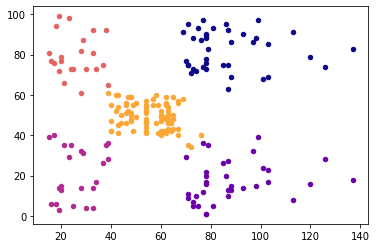

In [14]:
X=np.array(X)
plt.figure()
for i in range(k):
    plt.scatter(X[y_kmeans == i, 0], X[y_kmeans == i, 1], s = 20,
                 c = cmap(i/k), label = labels[i])

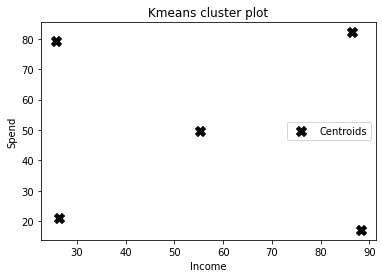

In [15]:
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            s = 100, c = 'black', label = 'Centroids', marker = 'X')
plt.xlabel('Income')
plt.ylabel('Spend')
plt.title('Kmeans cluster plot')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

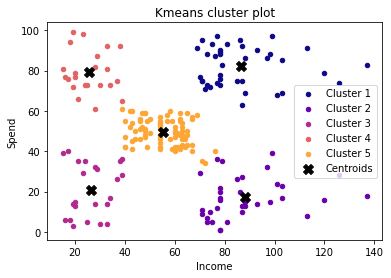

In [16]:
# 중점이랑 데이터 함께 표기
plt.figure()
for i in range(k):
    plt.scatter(X[y_kmeans == i, 0], X[y_kmeans == i, 1], s = 20,
                 c = cmap(i/k), label = labels[i])
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            s = 100, c = 'black', label = 'Centroids', marker = 'X')
plt.xlabel('Income')
plt.ylabel('Spend')
plt.title('Kmeans cluster plot')
plt.legend()
plt.show()

## 3. k-mean clustering

In [17]:
from scipy.spatial.distance import cdist, pdist
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [18]:
iris = pd.read_csv('data/iris.csv')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [19]:
x_iris = iris.drop(['class'],axis=1)
y_iris = iris["class"]
x_iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [20]:
y_iris.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: class, dtype: object

In [21]:
x_iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [22]:
# 정규화
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
scale.fit(x_iris)
X_scale=scale.transform(x_iris)
pd.DataFrame(X_scale).head()

,0,1,2,3
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [23]:
K = range(1,10)
KM = [KMeans(n_clusters=k).fit(X_scale) for k in K]
centroids = [k.cluster_centers_ for k in KM]

In [26]:
# cdist 거리계산 라이브러리를 이용하여 유클리디안 방법으로 거리를 게산
D_k = [cdist(x_iris, centrds, 'euclidean') for centrds in centroids]

In [27]:
# 최소값을 cIdx에 저장
cIdx = [np.argmin(D,axis=1) for D in D_k]

# dist로 최소값을 구함
dist = [np.min(D,axis=1) for D in D_k]

# 군집의 중심과 개체들 간의 최소 거리들의 평균
avgWithinSS = [sum(d)/X_scale.shape[0] for d in dist]

In [28]:
# Total with-in sum of square
wcss = [sum(d**2) for d in dist] #개체들간의 거리를 제곱하여 더한 값
tss = sum(pdist(X_scale)**2)/X_scale.shape[0] # 전체 개체들 간의 거리들을 제곱하여 거리로 나눔 
bss = tss-wcss

Text(0, 0.5, 'Average within-cluster sum of squares')

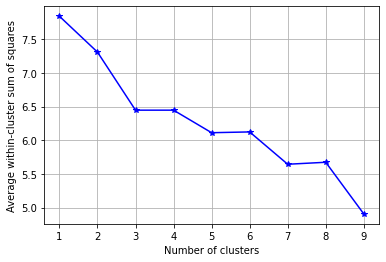

In [29]:
# elbow curve - Avg. within-cluster sum of squares
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(K, avgWithinSS, 'b*-')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Average within-cluster sum of squares')
#plt.title('Elbow for KMeans clustering')

Text(0, 0.5, 'Percentage of variance explained')

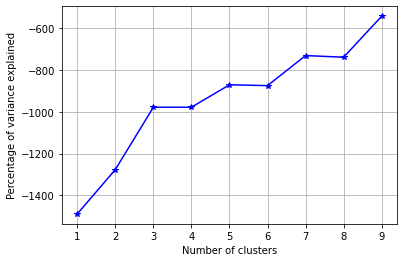

In [30]:
# elbow curve - percentage of variance explained
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(K, bss/tss*100, 'b*-')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Percentage of variance explained')
#plt.title('Elbow for KMeans clustering')

In [31]:
k_means_fit = KMeans(n_clusters=4, max_iter=300)
k_means_fit.fit(X_scale)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [32]:
# 중점 확인
k_means_fit.cluster_centers_

array([[-0.01139555, -0.87288504,  0.37688422,  0.31165355],
       [-1.28213558,  0.22643209, -1.30968035, -1.29836862],
       [ 1.16743407,  0.15377779,  1.00314548,  1.02963256],
       [-0.70049078,  1.56529014, -1.29924123, -1.20436862]])

In [34]:
print ("\nK-Means Clustering - Confusion Matrix\n\n",
       pd.crosstab(y_iris,k_means_fit.labels_,rownames = ["Actuall"],colnames = ["Predicted"]) )   


K-Means Clustering - Confusion Matrix

 Predicted         0   1   2   3
Actuall                        
Iris-setosa       0  27   0  23
Iris-versicolor  39   0  11   0
Iris-virginica   17   0  33   0


In [36]:
# 적합한 군집수를 찾는데에 활용하는 방법
print ("\nSilhouette-score: %0.3f" % silhouette_score(x_iris, k_means_fit.labels_, metric='euclidean'))


Silhouette-score: 0.350


In [37]:
# 군집수를 2개에서 10개까지 변경하면서 score를 찾기

for k in range(2,10):
    k_means_fitk = KMeans(n_clusters=k,max_iter=300)
    k_means_fitk.fit(x_iris)
    print ("For K value",k,",Silhouette-score: %0.3f" % silhouette_score(x_iris, k_means_fitk.labels_, metric='euclidean'))   

For K value 2 ,Silhouette-score: 0.681
For K value 3 ,Silhouette-score: 0.553
For K value 4 ,Silhouette-score: 0.498
For K value 5 ,Silhouette-score: 0.493
For K value 6 ,Silhouette-score: 0.368
For K value 7 ,Silhouette-score: 0.351
For K value 8 ,Silhouette-score: 0.365
For K value 9 ,Silhouette-score: 0.347


## 3. Hirearchical clustering
- 계층적 군집분석으로 한 번 어떤 군집에 속한 개체는 분석과정에서 다른 군집과 더 가깝게 계산되어도 다른 군집화가 허용되지 않는 방법

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')
import matplotlib.cm
cmap = matplotlib.cm.get_cmap('plasma')

In [39]:
# Reading in data
data = pd.read_csv('data/Mall_Customers.csv')
X = data.iloc[:, [3,4]].values

In [40]:
# Dendrogram to choose number of clusters (k)
import scipy.cluster.hierarchy as sch

- 개체들 간의 거리를 ward 방법으로 하고 sch의 dendrogram() 기능을 이용해서 덴드로그램을 

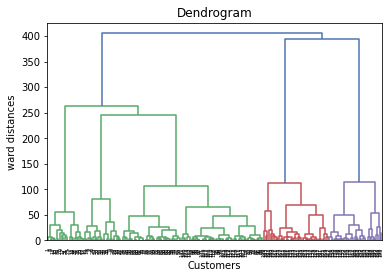

In [41]:
plt.figure(1)
z = sch.linkage(X, method = 'ward')
dendrogram = sch.dendrogram(z)
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('ward distances')
plt.show()

In [42]:
k = 5
# Clustering
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = k, affinity = "euclidean", linkage = 'ward')
y_hc = hc.fit_predict(X)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

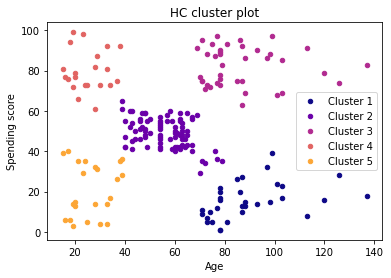

In [43]:
labels = [('Cluster ' + str(i+1)) for i in range(k)]
plt.figure(2)
for i in range(k):
    plt.scatter(X[y_hc == i, 0], X[y_hc == i, 1], s = 20,
                c = cmap(i/k), label = labels[i]) 
plt.xlabel('Age')
plt.ylabel('Spending score')
plt.title('HC cluster plot')
plt.legend()
plt.show()